# Homework 2

## Task 1 - Feature Selection

### Import Data

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
#from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 

dataset = pd.read_csv("magic04.data", names=["length", "width", "size", "conc", "conc1", "asym", "m3long", "m3trans", "alpha", "dist", "class"])
dataset = dataset.replace({'class': {'g': 1, 'h': 0}})
dataset.head()

,length,width,size,conc,conc1,asym,m3long,m3trans,alpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


### Calculate the Pearson's Correlation

In [27]:
data_features = dataset.drop(['class'], axis=1)


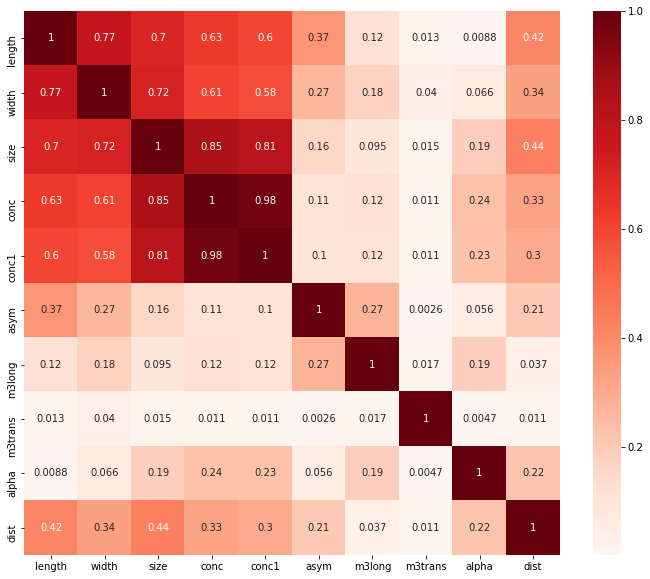

In [28]:
# Create correlation matrix
corr_matrix = data_features.corr().abs()
#print(corr_matrix.shape)
plt.figure(figsize=(12,10))

sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [29]:
def drop_features(ds, corr, threshold=0.8):
    # Select upper triangle of correlation matrix
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return ds.drop(ds[to_drop], axis=1)


In [30]:
reduced_dataset = drop_features(dataset, corr_matrix, threshold=0.5)
reduced_dataset.head()

,length,asym,m3long,m3trans,alpha,dist,class
0,28.7967,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,-5.5277,28.5525,21.8393,4.6480,356.4620,1


The features in this dataset show a very weak correlation between each other, to filter out the features with this process, the filter threshold has to be incredibly small.

### Calculate the ANOVA rank

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

N=30

k_bestfeatures = SelectKBest(score_func = f_classif)
rankings = k_bestfeatures.fit(data_features, dataset['class'])
b=list(rankings.scores_)
a=list(range(0,len(b)))
cols=data_features.columns.values.tolist()



sf = [g for _,g in sorted(zip(b,a))]
sf=sf[len(a)-N:len(a)]
c=1
sf=reversed(sf)
print(['order','index', 'column name','f-score'])
inx=[]
for chosen in sf:
    print(str(c)+'º:', chosen, cols[chosen], b[chosen], sep='\t')
    c+=1
    inx.append(chosen)
print(inx)

['order', 'index', 'column name', 'f-score']
1º:	8	alpha	5131.902635916578
2º:	0	length	1987.0965571351974
3º:	1	width	1443.3754692845762
4º:	6	m3long	739.0532981028642
5º:	5	asym	590.8648238186981
6º:	2	size	267.598593092886
7º:	9	dist	81.19801711803643
8º:	3	conc	11.529498376865606
9º:	4	conc1	0.43768710764237
10º:	7	m3trans	0.28002684810115686
[8, 0, 1, 6, 5, 2, 9, 3, 4, 7]


Calculating the ranking of the features with the F-score, we can see that the best features to use in this dataset are alpha and length.

### Dimension Reduction with PCA

6688
12332


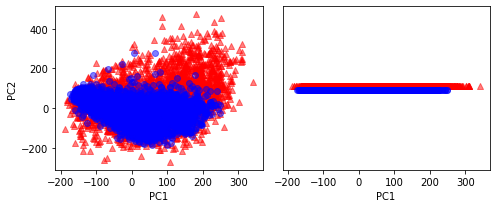

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(data_features)
y_df = dataset['class']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(df_pca[y_df == 0, 0], df_pca[y_df == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(df_pca[y_df == 1, 0], df_pca[y_df == 1, 1],
              color='blue', marker='o', alpha=0.5)

inx=sum(y_df==0)
print(inx)
ax[1].scatter(df_pca[y_df == 0, 0], np.zeros((inx, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
inx=sum(y_df==1)
print(inx)
ax[1].scatter(df_pca[y_df == 1, 0], np.zeros((inx, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('./figures/half_moon_2.png', dpi=300)
plt.show()

### Dimension Reduction with KPCA

6688
12332


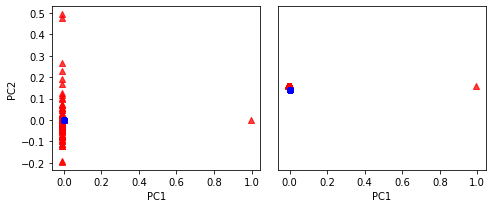

In [35]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
df_kpca = kpca.fit_transform(data_features)
y_df = dataset['class']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(df_kpca[y_df == 0, 0], df_kpca[y_df == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(df_kpca[y_df == 1, 0], df_kpca[y_df == 1, 1],
              color='blue', marker='o', alpha=0.5)

inx=sum(y_df==0)
print(inx)
ax[1].scatter(df_kpca[y_df == 0, 0], np.zeros((inx, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
inx=sum(y_df==1)
print(inx)
ax[1].scatter(df_kpca[y_df == 1, 0], np.zeros((inx, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('./figures/half_moon_2.png', dpi=300)
plt.show()

In [34]:
df_kpca[y_df == 0, 0]

array([-0.00014888, -0.00014888, -0.00014888, ..., -0.00014888,
       -0.00014888, -0.00014888])